In [15]:
## link for krish nayak notebook
##   https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Forecasting%20Facebook%20FbProphet.ipynb

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [18]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


<Axes: >

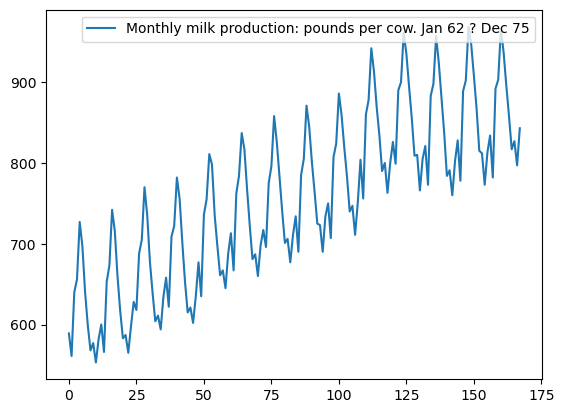

In [21]:
df.plot()

In [22]:
df.columns=["ds","y"]

In [23]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [24]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

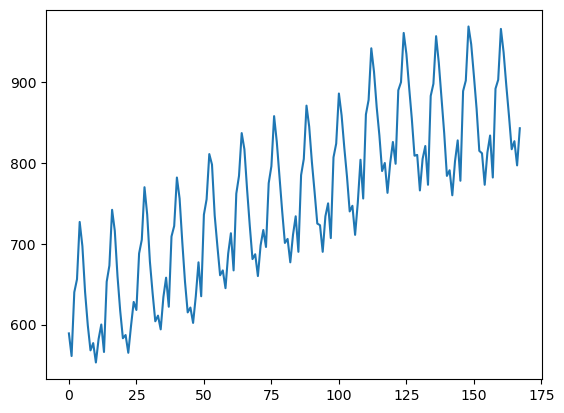

In [25]:
df['y'].plot()

In [26]:
df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [27]:
df['y'] = df['y'] - df['y'].shift(1)     #to make data stationary.If in one shift data doesn't becomes stationary thrn do shift again
df.head()                                #we can also use dickey fuller test 

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<Axes: >

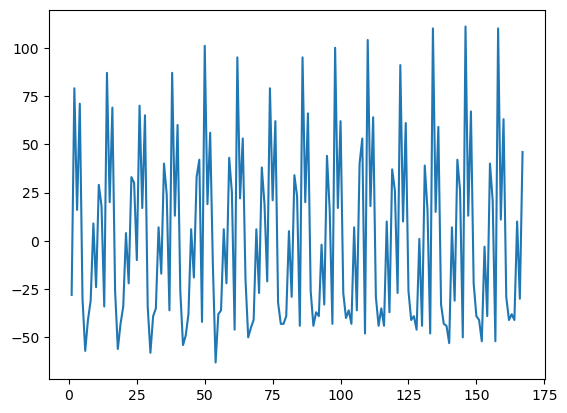

In [28]:
df['y'].plot()

In [29]:
from prophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [30]:
#initialize the model
model = Prophet()
model.fit(df)

15:27:21 - cmdstanpy - INFO - Chain [1] start processing
15:27:21 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
model

In [32]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [33]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [35]:
#make future dates for predicition (of 365 days)

future_dates = model.make_future_dataframe(periods = 365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [38]:
#prediction

predictions = model.predict(future_dates)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.039864,17.318473,36.542444,2.039864,2.039864,24.993626,24.993626,24.993626,24.993626,24.993626,24.993626,0.0,0.0,0.0,27.033489
1,1962-02-01,2.038104,-47.779415,-29.048670,2.038104,2.038104,-40.256444,-40.256444,-40.256444,-40.256444,-40.256444,-40.256444,0.0,0.0,0.0,-38.218339
2,1962-03-01,2.036515,86.473617,104.034692,2.036515,2.036515,93.019876,93.019876,93.019876,93.019876,93.019876,93.019876,0.0,0.0,0.0,95.056391
3,1962-04-01,2.034756,6.907800,26.346546,2.034756,2.034756,14.325220,14.325220,14.325220,14.325220,14.325220,14.325220,0.0,0.0,0.0,16.359976
4,1962-05-01,2.033053,52.968352,71.546083,2.033053,2.033053,60.542691,60.542691,60.542691,60.542691,60.542691,60.542691,0.0,0.0,0.0,62.575744


In [40]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.834348,4.343421,22.560616
529,1976-11-27,18.281692,9.240305,27.981501
530,1976-11-28,23.861999,14.340430,33.420015
531,1976-11-29,29.462740,20.699289,38.481360
532,1976-11-30,34.965513,25.365928,44.702766


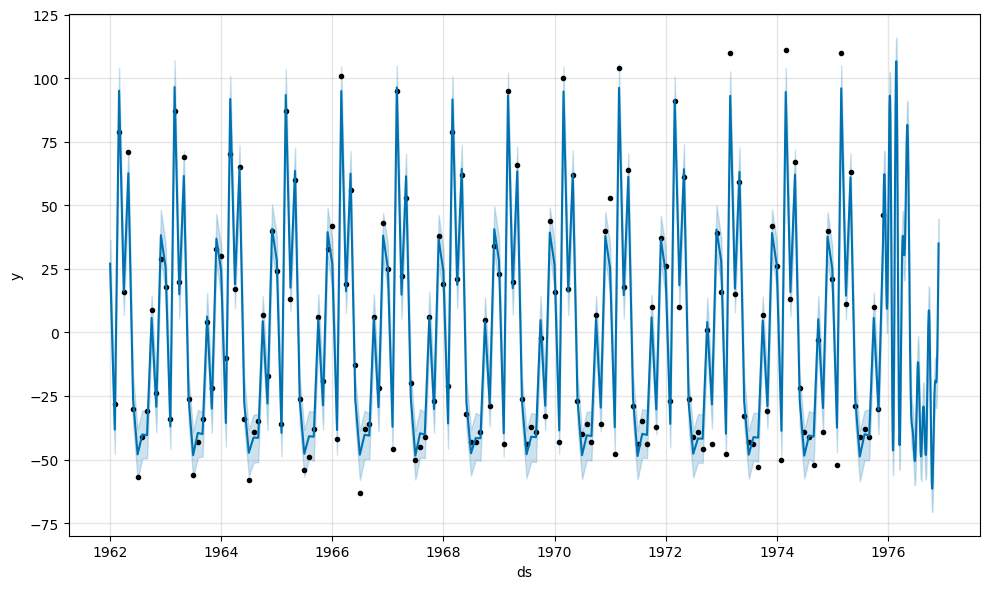

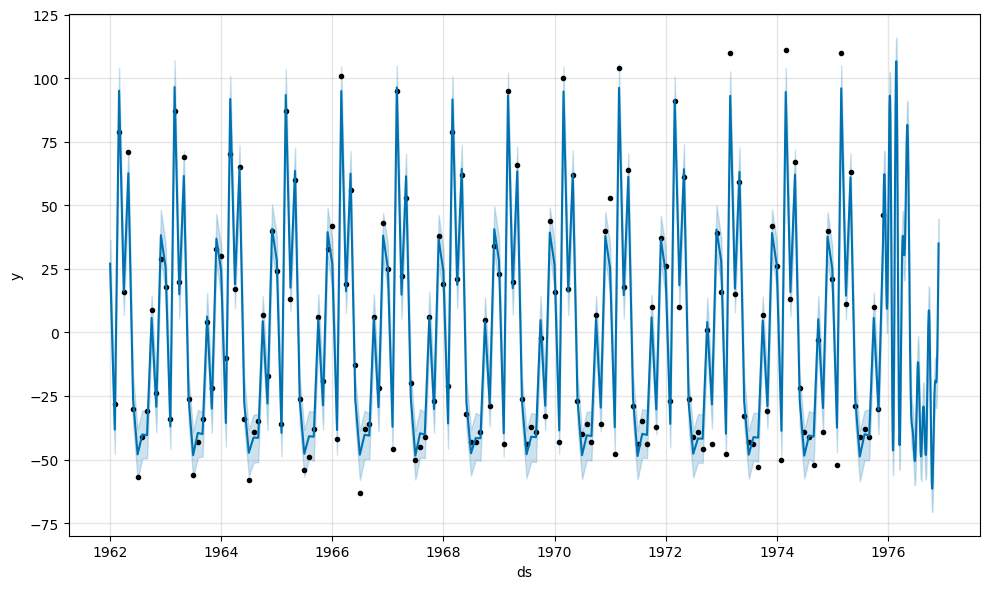

In [42]:
#### plot the predicted projection
model.plot(predictions)

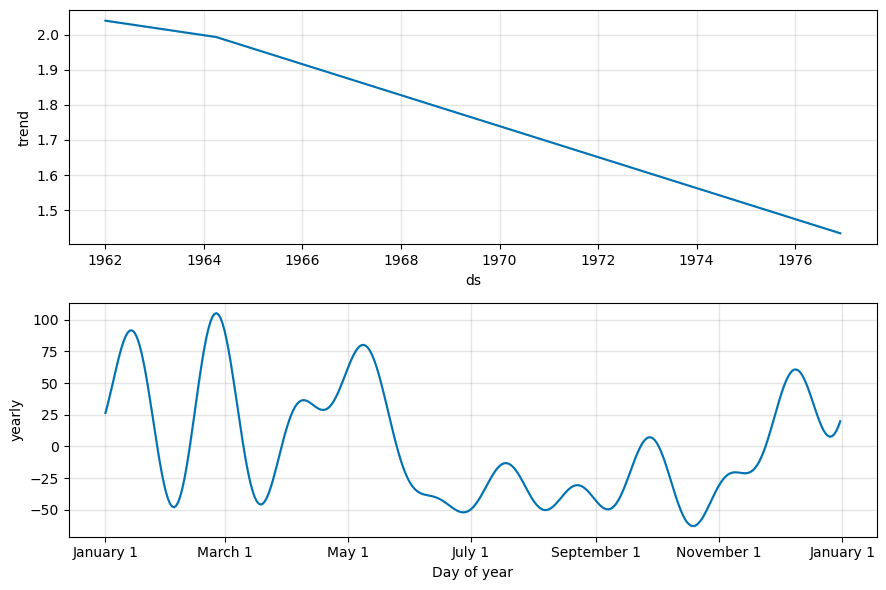

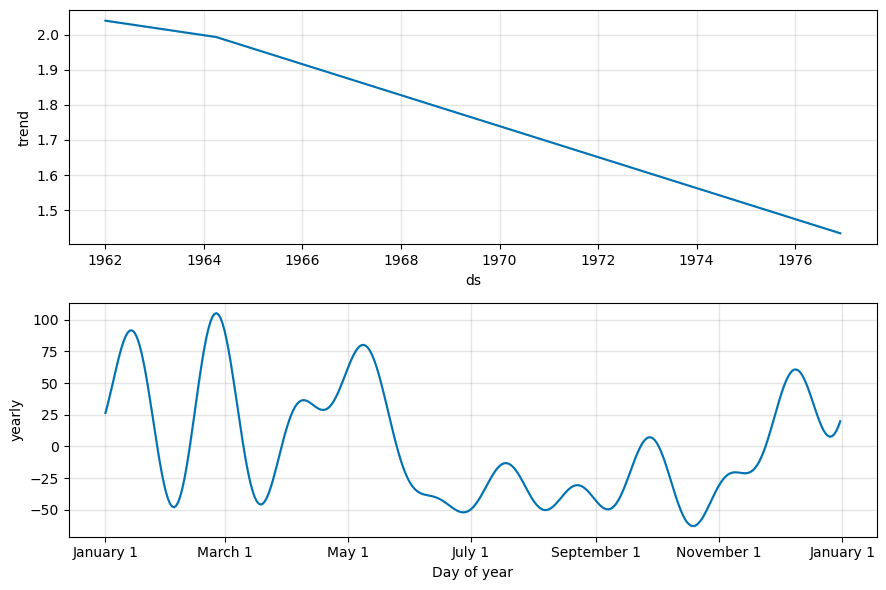

In [43]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(predictions)

In [44]:
#Cross Validation

In [45]:
df.shape

(168, 2)

In [46]:
from prophet.diagnostics import cross_validation

In [47]:
df_cv = cross_validation(model,horizon="365 days",period='180 days',initial='1095 days') 
#horizon - prediction pf last 365 days
#period = cut off period (forecast will be done at every this perios) = 0.5 * horizon
#initial first training period will begin here , = 3 * horizon

  0%|          | 0/20 [00:00<?, ?it/s]

15:49:50 - cmdstanpy - INFO - Chain [1] start processing
15:49:51 - cmdstanpy - INFO - Chain [1] done processing
15:49:52 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:54 - cmdstanpy - INFO - Chain [1] start processing
15:49:55 - cmdstanpy - INFO - Chain [1] done processing
15:49:56 - cmdstanpy - INFO - Chain [1] start processing
15:49:57 - cmdstanpy - INFO - Chain [1] done processing
15:49:58 - cmdstanpy - INFO - Chain [1] start processing
15:49:58 - cmdstanpy - INFO - Chain [1] done processing
15:50:00 - cmdstanpy - INFO - Chain [1] start processing
15:50:00 - cmdstanpy - INFO - Chain [1] done processing
15:50:01 - cmdstanpy - INFO - Chain [1] start processing
15:50:02 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:05 - cmdstanpy - INFO - Chain [1] done processing
15:50:06 - cmdstanpy - INFO - Chain [1] start processing
15:50:07 - cmdstanpy - INFO - Chain [1]

In [48]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898333,-46.236368,-34.958190,-49.0,1965-07-21
1,1965-09-01,-34.869403,-40.469836,-29.595286,-38.0,1965-07-21
2,1965-10-01,6.103185,0.580890,11.203592,6.0,1965-07-21
3,1965-11-01,-20.281447,-25.691542,-14.692265,-19.0,1965-07-21
4,1965-12-01,36.035424,30.034834,41.301349,33.0,1965-07-21


In [49]:
df_cv.shape

(240, 6)

In [50]:
#Obtaining the Performance Metrics

In [51]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,123.651460,11.119868,9.143522,0.262934,0.196424,0.253283,0.458333
1,42 days,115.558171,10.749799,8.598919,0.233281,0.178192,0.232201,0.541667
2,43 days,123.154693,11.097508,8.819810,0.226318,0.178192,0.228461,0.541667
3,46 days,89.237514,9.446561,7.877814,0.213616,0.178192,0.205814,0.583333
4,47 days,87.212789,9.338779,7.692149,0.210462,0.178192,0.202780,0.604167


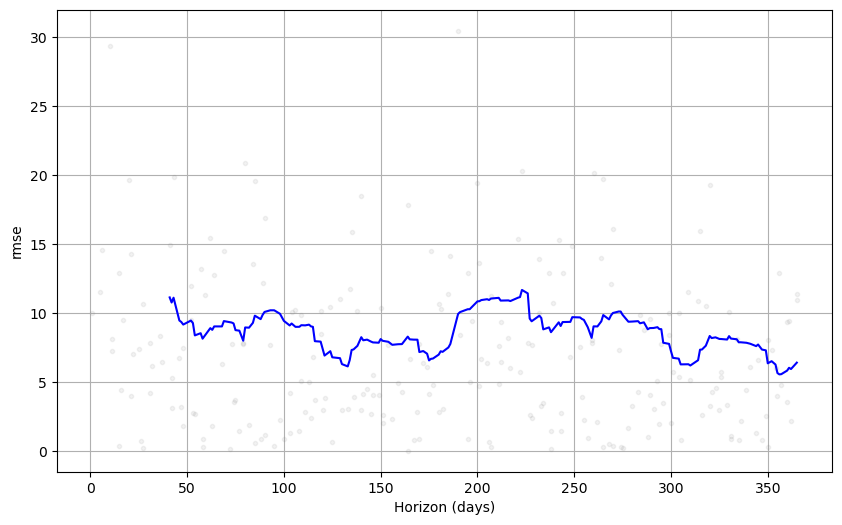

In [52]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')